In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
106,ham,"Aight, I'll hit you up when I get some cash",NaN,NaN,NaN
1700,ham,Please ask mummy to call father,NaN,NaN,NaN
3308,ham,Okie Ì_ wan meet at bishan? Cos me at bishan n...,NaN,NaN,NaN
4410,ham,Ya but it cant display internal subs so i gott...,NaN,NaN,NaN
2418,ham,"Madam,regret disturbance.might receive a refer...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA (Exploratory data analysis)
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvements
#7. Website
#8. Deploy

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columnns
df.drop(columns=['Unnamed: 2','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2,Unnamed: 3
1775,ham,Did u see what I posted on your Facebook?,NaN
4585,spam,"Mila, age23, blonde, new in UK. I look sex wit...",NaN
3002,ham,I will see in half an hour,NaN
5495,ham,"Good afternoon, my love ... How goes your day ...",NaN
4476,ham,Oh :-)only 4 outside players allowed to play know,NaN


In [9]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text','Unnamed: 3':'NaN(Not a number)'},inplace=True)
df.sample(5)

,target,text,NaN(Not a number)
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P",NaN
2994,ham,Mm not entirely sure i understood that text bu...,NaN
4113,ham,Where are you ? What do you do ? How can you s...,NaN
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?,NaN
1139,ham,Message:some text missing* Sender:Name Missing...,NaN


In [10]:
#to show numbers in 'target' column  
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text,NaN(Not a number)
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [13]:
#missing values
df.isnull().sum()

target                  0
text                    0
NaN(Not a number)    5560
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 3)

## 2.EDA (Explotary Data Analysis)

In [22]:
#understanding about data
#checking % of ham and spam
df.head()

,target,text,NaN(Not a number)
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ------- ----------------------------- 30.7/162.3 kB 660.6 kB/s eta 0:00:01
     ---------------------- ---------------- 92.2/162.3 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.2/7.6 MB 4.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.6 MB 5.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 4.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 4.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.6 MB 2.9 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.6 MB 3.0 MB/s eta 0:00:03
   ------ 

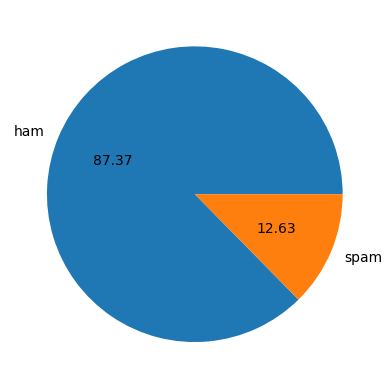

In [29]:
#for displaying pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
#Data is imbalanced

In [31]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 4.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 4.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 4.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 3.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 3.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 3.2 MB/s eta 0:00:01
   ----------------- -

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
#Finding length of each string
df['num_characters']=df['text'].apply(len)

In [36]:
df.head()

,target,text,NaN(Not a number),num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61


In [38]:
#num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [39]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [40]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df.head()

,target,text,NaN(Not a number),num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15


In [42]:
#number of sentences
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [43]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [44]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,NaN(Not a number),num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1


In [46]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [50]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 876.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


In [52]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

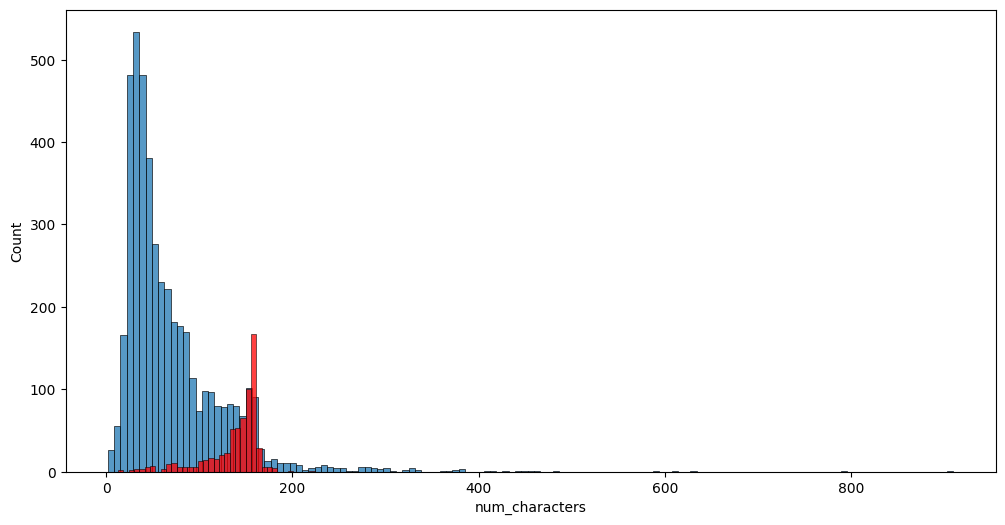

In [56]:
#count of number of characters in ham and spam respectively
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

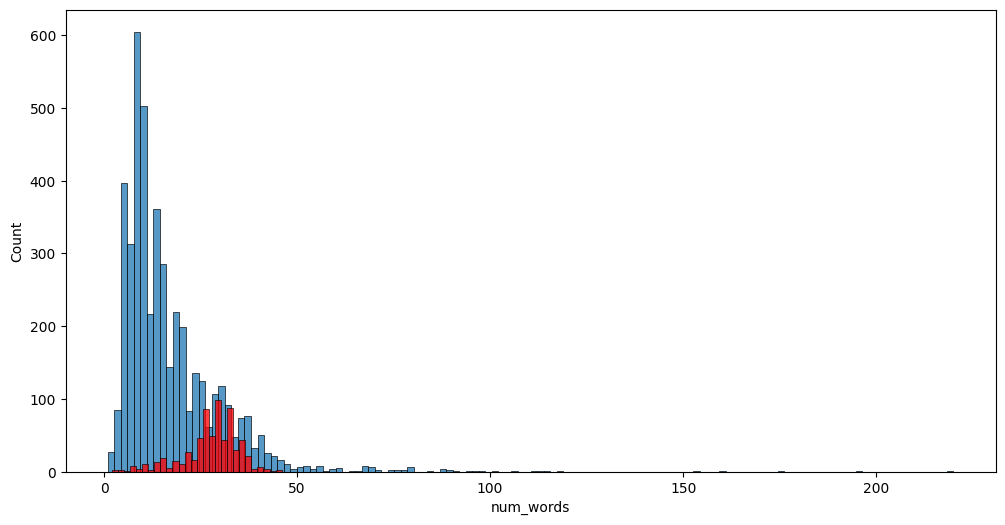

In [57]:
#count of number of words in ham and spam respectively
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

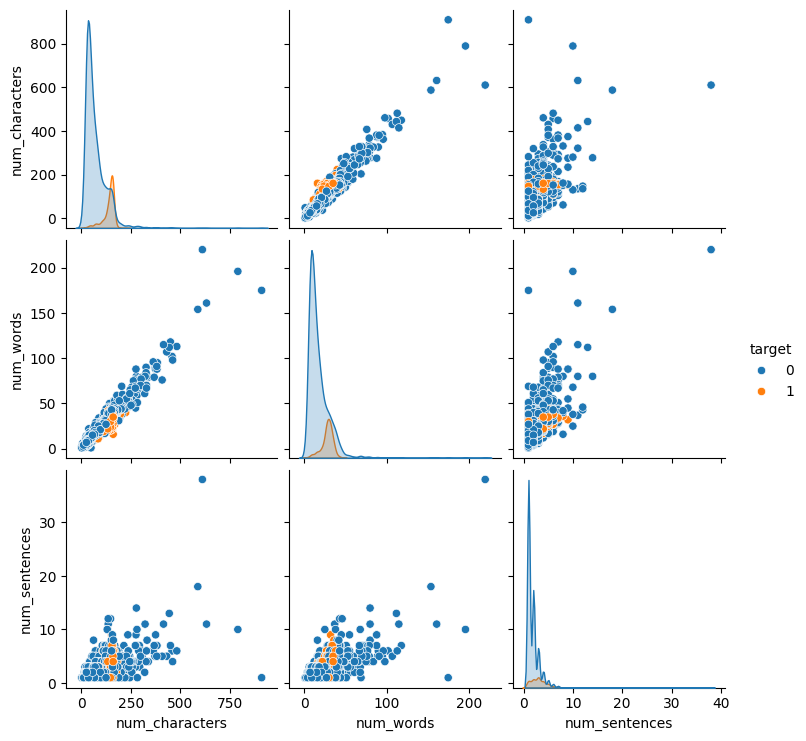

In [58]:
#to find relationship between number of sentences,characters,words
sns.pairplot(df,hue='target')

In [62]:
#sns.heatmap(df.corr(),annot=True) #correlation coefficient

## 3.Data Preprocessing
   <ul>1.Lower case</ul>
   <ul>2.Tokenization</ul>
   <ul>3.Removing special characters</ul>
   <ul>4.Removing stop words and punctuation</ul>
   <ul>5.Stemming </ul>

In [91]:
#creating a new function 
def transform_text(text):
    text=text.lower()             #lower case
    text=nltk.word_tokenize(text) #tokenization
    
    y=[]
    for i in text:                #removing special characters
        if i.isalnum():           #alphanumeric
            y.append(i)

    text=y[:]    #used for cloning
    y.clear()

    for i in text:                #removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]                   #making it to base word by removing 'ing' for example 
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [77]:
from nltk.corpus import stopwords  #removing stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
import string               #removing punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [84]:
transform_text('Hi How are you 20% %% eg? Nitish')

['hi', '20', 'eg', 'nitish']

In [93]:
transform_text('Did you like my presentation on ML? I am loving it ')

'like present ml love'

In [94]:
from nltk.stem.porter import PorterStemmer  #making it to base word from loving to love
ps=PorterStemmer()
ps.stem('loving')


'love'

In [96]:
df['transformed_text']=df['text'].apply(transform_text) #using the function in our text

In [97]:
df.head()

,target,text,NaN(Not a number),num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [99]:
!pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 495.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 939.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.6 MB/s eta 0:00:00


In [109]:
from wordcloud import WordCloud       #will highlight important words
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [115]:
#displays main words in spam messages
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

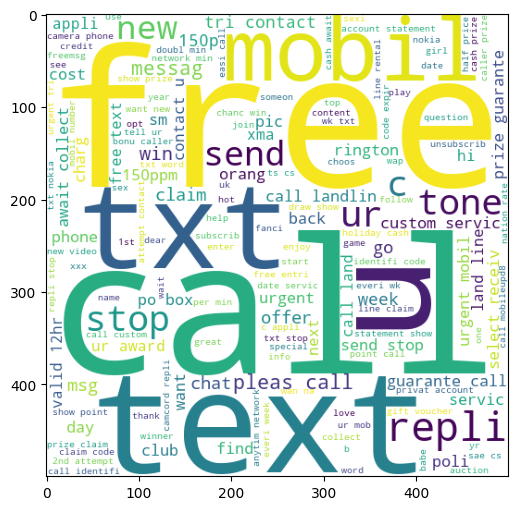

In [114]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [116]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

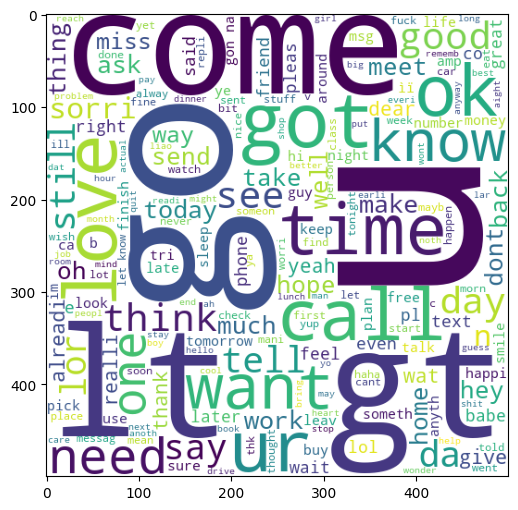

In [117]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [122]:
#top 30 words in ham and spam messages
spam_corpus=[]           #empty list
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [124]:
len(spam_corpus)

9939

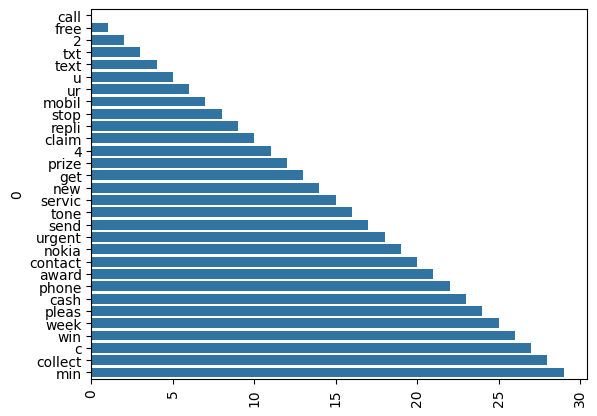

In [138]:
#ranking of each words
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

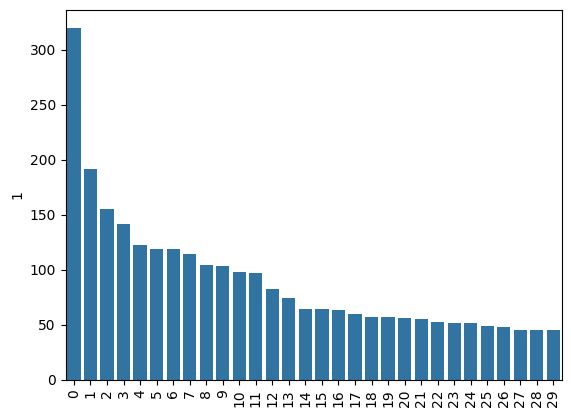

In [136]:
#number of times the above common words are used 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
ham_corpus=[]           #empty list
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [140]:
len(ham_corpus)

35404

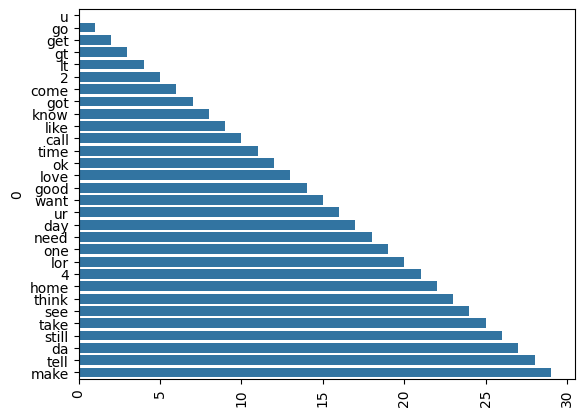

In [141]:
#ranking of each words
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

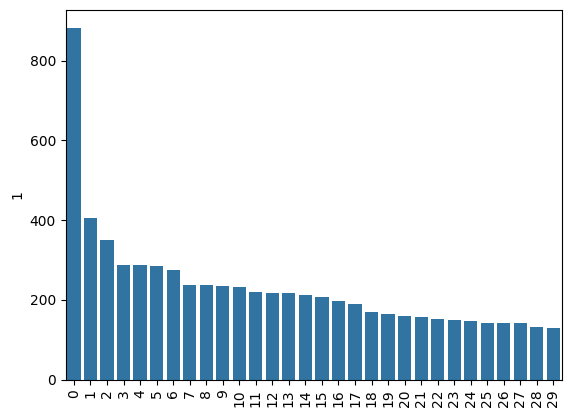

In [142]:
#number of times the above common words are used 
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [298]:
#converting text to numbers
#using bag of words method
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [299]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [234]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x = scaler.fit_transform(x)

In [300]:
y=df['target'].values

In [301]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [239]:
#algorithms
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

#GausianNB : a variant of the Naive Bayes algorithm that is suitable for classification tasks when the features (variables) are continuous and assumed to have a Gaussian (normal) distribution.
#MulitnomialNB: another variant of the Naive Bayes algorithm specifically designed for text classification tasks.
#BernoulliNB: another variant of Naive Bayes, particularly useful when dealing with binary or boolean features.
#confusion_matrix: presents a summary of the predicted classes versus the actual classes in tabular form

In [304]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [241]:
#GaussianNB
gnb.fit(x_train,y_train) 
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [305]:
#MultinomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [243]:
#BernoulliNB
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [244]:
#since precision of MultinomialNB through tfdif, we use that

In [189]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.6/99.8 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.7/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.8/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.8/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.9/99.8 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 1.1/99.8 MB 2.3 MB/s eta 0:00:44
   ----

In [245]:
#for comparing different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [246]:
#creating objects
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc =  BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [247]:
#creating dictionary
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GDBT':gbdt,
    'xgb':xgb
}

In [248]:
svc = SVC(kernel='sigmoid', gamma=1.0)

In [249]:
#creating function
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [250]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [254]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9690522243713733
Precision:  0.9274193548387096
For  KN
Accuracy:  0.9052224371373307
Precision:  0.9761904761904762
For  NB
Accuracy:  0.9787234042553191
Precision:  0.9461538461538461
For  DT
Accuracy:  0.9303675048355899
Precision:  0.8173076923076923
For  LR
Accuracy:  0.9671179883945842
Precision:  0.9642857142857143
For  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For  GDBT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For  xgb
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213


In [255]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [256]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GDBT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [257]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [258]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,AdaBoost,Accuracy,0.960348
6,SVC,Accuracy,0.969052
7,xgb,Accuracy,0.967118
8,GDBT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


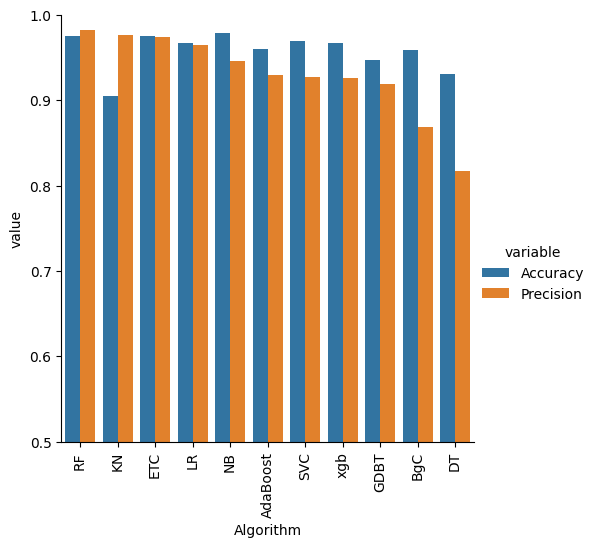

In [259]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [227]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [273]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [274]:
performance_df.merge(temp_df1,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,SVC,0.969052,0.927419,0.969052,0.927419
7,xgb,0.967118,0.926230,0.967118,0.926230
8,GDBT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [269]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [270]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [271]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [275]:
new_df_scaled.merge(temp_df1,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GDBT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [280]:
#Voting Classifier:
#Combination of best performing algorithms
#Can perform better than the  current performance
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [281]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [282]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [283]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [289]:
#Applying stacking: 
#giving weightage using final estimator
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [290]:
from sklearn.ensemble import StackingClassifier

In [291]:
clf = StackingClassifier(estimators = estimators,final_estimator = final_estimator)

In [293]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9825918762088974
Precision  0.9615384615384616


In [308]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))